# Test Bayesian filtering model on IBL data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import default_rng
from scipy.special import logit, expit

from bfdm.iblmodel import IBLModel

In [2]:
rng = default_rng(999)

## Load IBL data

In [3]:
# Load DataFrame
df = pd.read_csv('../data/ibl/test_1.csv', index_col=0);

# Load data from DataFrame into numpy array
data = df[['block', 'correct_side', 'signed_contrast', 'choice']].to_numpy()
b = data[:, 0]
s = data[:, 1]
x = data[:, 2]
y = data[:, 3]

## Fit model

In [4]:
# Fit model to preductions from optimal model
model = IBLModel()
model.fit(x, s, y)

r = model.decision_function(x, s)

In [5]:
# Print parameters of fit model
print(f'h: {model.h}')
print(f'a: {model.a}')
print(f'w_0: {model.w_0}')
print(f'w_1: {model.w_1}')

h: 0.0011844619366348538
a: 0.10304745665589281
w_0: -1.0781387020773185
w_1: 3.570676207960097


## Plot results

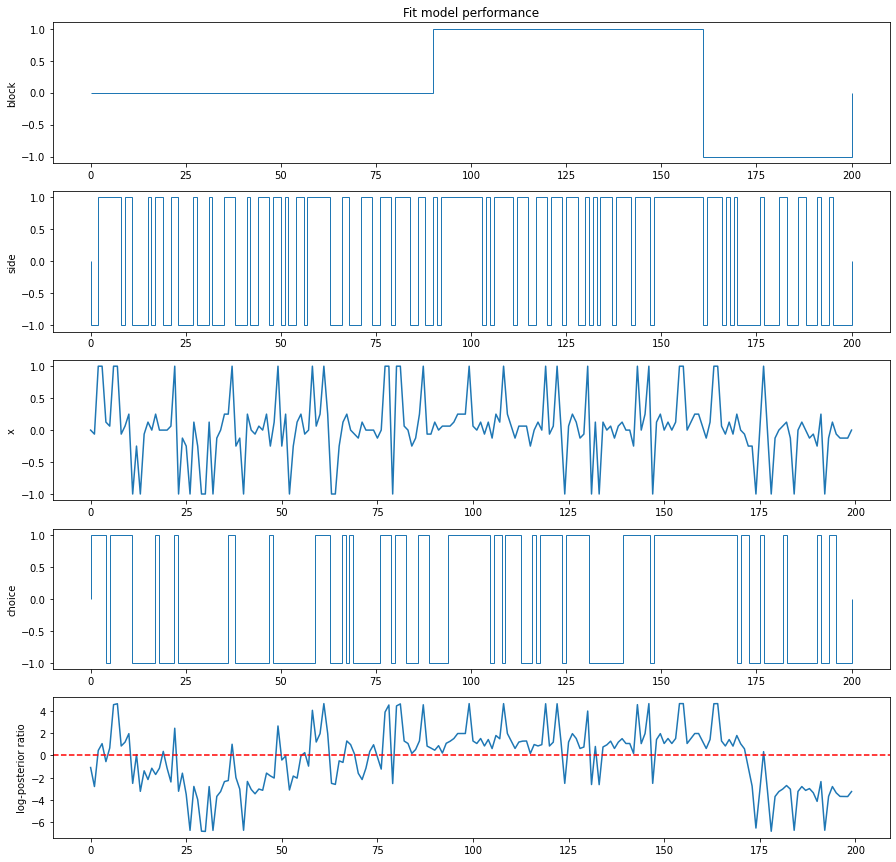

In [6]:
idx = np.s_[:200]

(fig, ax) = plt.subplots(5, 1, figsize=(15, 15))

ax[0].stairs(b[idx])
ax[0].set_ylabel('block')

ax[1].stairs(s[idx])
ax[1].set_ylabel('side')

ax[2].plot(x[idx])
ax[2].set_ylabel('x')

ax[3].stairs(y[idx])
ax[3].set_ylabel('choice')

ax[4].plot(r[idx])
ax[4].axhline(y=0, color='r', linestyle='--')
ax[4].set_ylabel('log-posterior ratio')

ax[0].set_title('Fit model performance');

In [7]:
b_corr = np.corrcoef(r, b)[0, 1]
s_corr = np.corrcoef(r, s)[0, 1]
y_corr = np.corrcoef(r, y)[0, 1]

print(f'corr(r, b): {b_corr}')
print(f'corr(r, s): {s_corr}')
print(f'corr(r, y): {y_corr}')

corr(r, b): 0.7095159488829009
corr(r, s): 0.6723198076288274
corr(r, y): 0.7364735333837662
